# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Valentin Kämmerer

Datum: 19.11.2023

Gruppe: 45

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Ist es möglich, anhand der Temperaturänderung von einem Behälter durch Energiezufuhr (wärmeres Wasser) dessen Wärmekapazität zu bestimmen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

Der Versuch besteht aus einem Behälter mit kaltem Wasser (ich habe hier einen Topf genommen) und ein Behälter mit warmen Wasser (ein Glas). Die Masse des kalten Wassers beträgt einen halben Liter (0.5kg) und die Masse des warmen Wasser ein viertel Liter (0.25kg). Die beiden Temperatursensoren sind mit dem Pi verbunden und bereit zur Messung. Nun habe ich den Sensor 1 in das ca. 60 Grad warme Wasser im Glas reingetan und den Sensor 2 in das kalte Wasser. Dann habe ich ca. 60 Sekunden gewartet, damit die Sensoren sich an die jeweilige Temperatur anpassen können und dann habe ich die Messung gestartet. Nach ungefähr 30 Sekunden Messzeit habe ich das Glas mit dem warmen Wasser in den Topf zum kalten Wasser geschüttet, wobei der Sensor 1 ebenfalls in den Topf gefallen ist. Dann habe ich nochmal gut 50 Sekunden gewartet, damit sich die Mischungstemperatur gut einstellen kann. Dann habe ich den Messvorgang gestoppt und die Messdaten wurden abgespeichert.


<img src="figures/Versuch 1.jpg" width="800">

## Versuchsauswertung

In [123]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5
from functions import m_json
import colorama
from colorama import Fore
# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [124]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
hdf5_path = "data/heat_capacity_measurement_data/heat_capacity_measurement_data.h5"
measurement_data_path = "data/heat_capacity_measurement_data"
# DONE #

In [125]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
f = h5.File(hdf5_path, 'r')
g = f["RawData"]
RawData = g["RawData"]
created = f.attrs["created"]
experiment = f.attrs["experiment"]
group_number = f.attrs["group_number"]
authors = f.attrs["authors"]
uuids = list(RawData.keys())
sensor_1_path = "RawData/RawData/"+uuids[0]
sensor_2_path = "RawData/RawData/"+uuids[1]
sensor_1 = f[sensor_1_path]
sensor_2 = f[sensor_2_path]
temp_sensor_1 = list(sensor_1["temperature"])
temp_sensor_2 = list(sensor_2["temperature"])
time_sensor_1 = list(sensor_1["time step"])
time_sensor_2 = list(sensor_2["time step"])

#zur Kontrolle
print(Fore.BLUE + "sensor_1_path:")
print(sensor_1_path)
print(Fore.GREEN + "temp_sensor_1:")
print(temp_sensor_1)
print(Fore.RED + "time_sensor_1:")
print(time_sensor_1)
# DONE #

sensor_1_path:
RawData/RawData/1ee848b5-b8fc-62e0-bc48-7ff7c050d4a5
temp_sensor_1:
[54.8125, 54.625, 54.4375, 54.375, 54.25, 54.125, 54.0625, 54.0, 53.875, 53.8125, 53.75, 53.75, 53.6875, 53.625, 53.5625, 53.5625, 53.5, 53.4375, 53.375, 53.0, 52.3125, 52.3125, 50.375, 47.25, 44.5625, 42.375, 40.625, 39.25, 38.0625, 37.0625, 36.1875, 35.375, 34.75, 34.25, 33.75, 33.375, 33.0, 32.75, 32.5, 32.3125, 32.0625, 31.9375, 31.75, 31.625, 31.5, 31.4375, 31.3125, 31.1875, 31.1875, 31.0625, 31.0, 31.0, 30.9375, 30.875, 30.875, 30.8125, 30.8125]
time_sensor_1:
[1700392580.5433204, 1700392582.1432414, 1700392583.743239, 1700392585.3432553, 1700392586.9426527, 1700392588.5426097, 1700392590.1426065, 1700392591.7432082, 1700392593.3431082, 1700392594.9751928, 1700392596.5751975, 1700392598.1751118, 1700392599.7751994, 1700392601.3752005, 1700392602.975273, 1700392604.5751004, 1700392606.1752129, 1700392607.7752104, 1700392609.375224, 1700392611.0072248, 1700392612.6072128, 1700392614.2071648, 17003926

#### (ii) Daten ploten

Text(0, 0.5, 'Temperatur in °C')

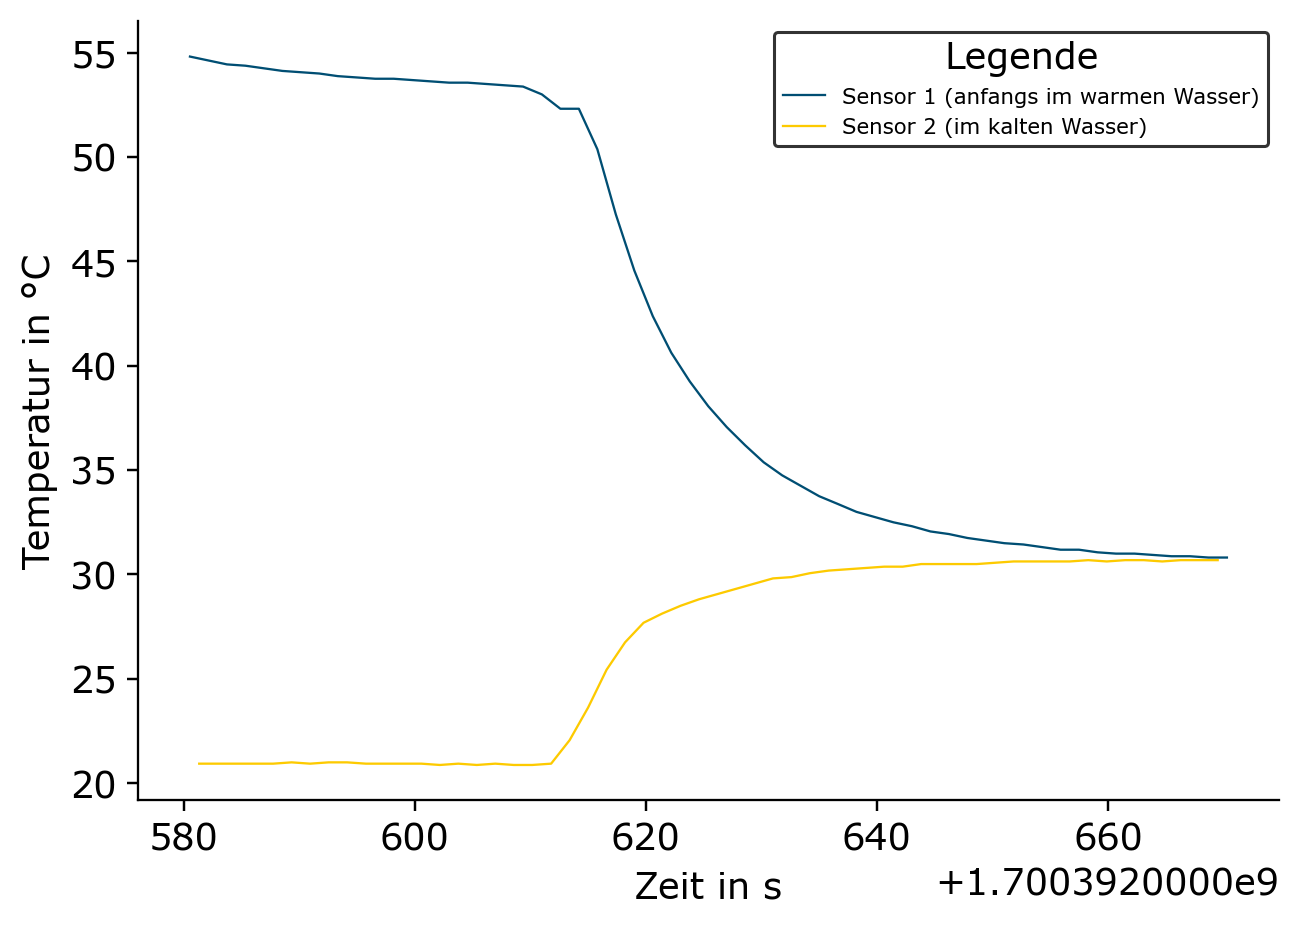

In [126]:
# TODO: Use the temperature and time data for plotting
fig = plt.figure()
plt.plot(time_sensor_1, temp_sensor_1, label = "Sensor 1 (anfangs im warmen Wasser)")
plt.plot(time_sensor_2, temp_sensor_2, label = "Sensor 2 (im kalten Wasser)")
plt.legend(loc = "upper right", fontsize = "xx-small", title = "Legende", frameon = True, edgecolor = 'black')
plt.xlabel("Zeit in s")
plt.ylabel("Temperatur in °C")
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [127]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
mass_cold_water = float(m_json.get_json_entry(measurement_data_path, "1ee84a23-64ae-6af1-ad41-f5b5c0cb8b85", ["probe", "metadata", "mass cold water"]))
mass_warm_water = float(m_json.get_json_entry(measurement_data_path, "1ee84a23-64ae-6af1-ad41-f5b5c0cb8b85", ["probe", "metadata", "mass warm water"]))
print("mass_cold_water:", mass_cold_water)
print("mass_warm_water", mass_warm_water)
# DONE #

mass_cold_water: 0.5
mass_warm_water 0.25


#### (iV) Anfangs- und Endwert der Temperatur

In [128]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
#Temperatur vom kalten Wasser vor dem Mischen
T_1 = min(temp_sensor_2)
#Temperatur vom warmen Wasser vor dem Mischen
T_2 = max(temp_sensor_1)
#Mischungstemperatur 
T_M = temp_sensor_2.pop()

print("T_1 =", T_1)
print("T_2 =", T_2)
print("T_M =", T_M)
# DONE #

T_1 = 20.875
T_2 = 54.8125
T_M = 30.6875


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [129]:
# TODO: Calculate heat capacity of the calorimeter
m_add = mass_warm_water
m_cup = mass_cold_water
c_w = water_heat_capa

C = (m_add*c_w*(T_2-T_M))/(T_M-T_1)-m_cup*c_w

# DONE #

#### (Vi) Ergebnis

In [130]:
# TODO: Print result

print("C =", C, "kJ/°C")

# DONE #

C = 0.47923566878980894 kJ/°C


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die Wärmekapazität sagt aus, wie viel Energie notwendig ist, um ein Material, in meinem Fall war es ein Metalltopf, um ein Grad Celsius zu erwärmen. Da ich die Temperaturen der einzelnen Behälter (vom Wasser) gemessen habe und dann auch die Mischungstemperatur, konnte ich die Wärmekapazität des Behälters C bestimmen. Diese ist ca. 0.479. Das heißt, um die Masse meines Behälters um ein Grad Celsius zu erwärmen, benötigt man 0.479 kJ Energie.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Ich habe beim Versuch gelernt, mit Sensoren zu arbeiten, damit Messungen durchzuführen und die Messdaten so abzuspeichern, 
dass sie geordnet sind und zugänglich. Zusätzlich habe ich gelernt über UUIDs alles eindeutig festzulegen, 
sodass alles individuell abrufbar ist ohne dass Verwechslungen entstehe. Zum Schluss habe ich mit Hilfe 
der Messdaten die Wärmekapazität meines Behälters bestimmen können was das Ziel dieses Versuches war.